In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h1>PREPROCESSIONG</h1>

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df=df.drop(columns=['CustomerId', 'Surname'])

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


<H1>EDA</H1>

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

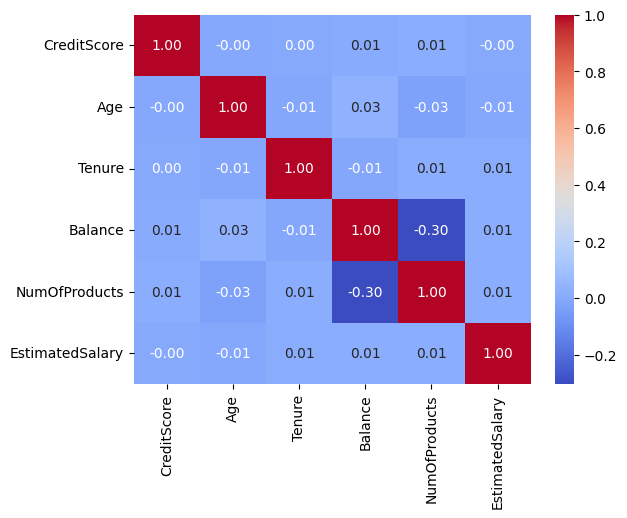

In [36]:
# Correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Heatmap

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")



C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

<Axes: xlabel='Exited', ylabel='count'>

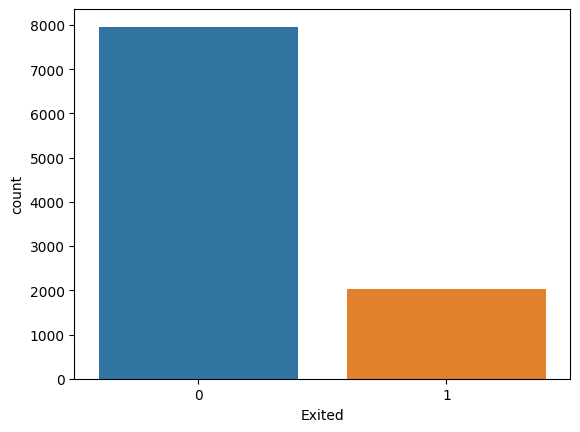

In [42]:
sns.countplot(x='Exited', data=df)


C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

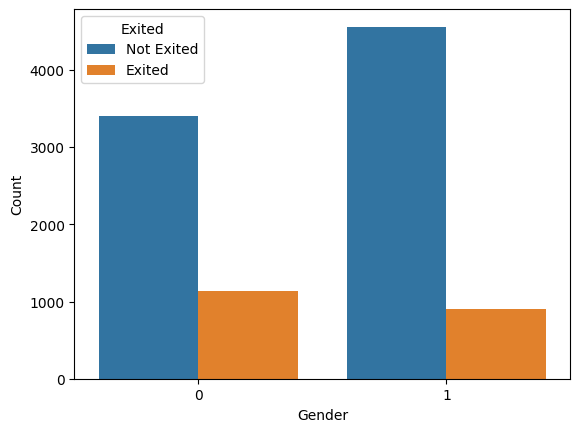

In [44]:
sns.countplot(x='Gender', hue='Exited', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Not Exited', 'Exited'])
plt.show()

C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalD

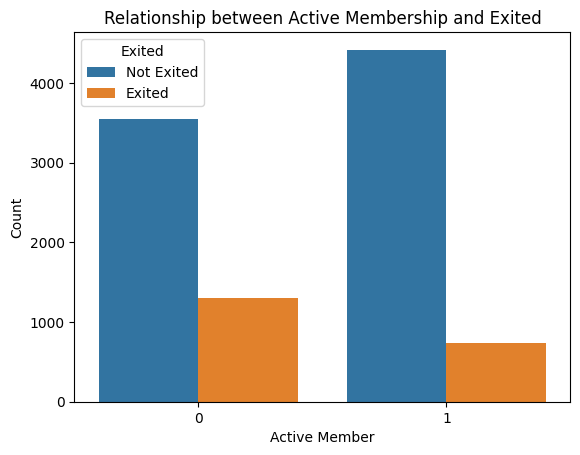

In [45]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Relationship between Active Membership and Exited')
plt.xlabel('Active Member')
plt.ylabel('Count')
plt.legend(title='Exited', labels=['Not Exited', 'Exited'])
plt.show()

<H1>DATA SPLITING AND MODEL FITTING</H1>

In [18]:
x = df.iloc[:-1, :-1]  # Exclude the last row and last column for x
y = df.iloc[:-1, -1]   # Exclude the last row, but only select the last column for y

In [19]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=32)

In [24]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
pred=lr.predict(xtest)

In [27]:
acc=accuracy_score(ytest,pred)

In [28]:
print(acc)

0.777


<H1>ACCURACY ACHIEVED 78%</H1>

<H1>GUI</H1>

In [ ]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def predict_exit():
    # Get input values
    credit_score = float(credit_score_entry.get())
    geography = float(geography_entry.get())
    gender = float(gender_entry.get())
    age = float(age_entry.get())
    tenure = float(tenure_entry.get())
    balance = float(balance_entry.get())
    num_of_products = float(num_of_products_entry.get())
    has_cr_card = float(has_cr_card_var.get())
    is_active_member = float(is_active_member_var.get())
    estimated_salary = float(estimated_salary_entry.get())

    # Create a DataFrame with input values
    input_df = pd.DataFrame({
        'CreditScore': [credit_score],
        'Geography': [geography],
        'Gender': [gender],
        'Age': [age],
        'Tenure': [tenure],
        'Balance': [balance],
        'NumOfProducts': [num_of_products],
        'HasCrCard': [has_cr_card],
        'IsActiveMember': [is_active_member],
        'EstimatedSalary': [estimated_salary]
    })

    
    prediction = lr.predict(input_df)

    # Display the result
    result_label.config(text=f"Prediction: {'Exited' if prediction[0] == 1 else 'Not Exited'}")

# Create the Tkinter window
window = tk.Tk()
window.title("Exit Prediction App")

# Create and place entry widgets
credit_score_entry = ttk.Entry(window, width=15)
credit_score_entry.grid(row=0, column=1, padx=10, pady=5)
geography_entry = ttk.Entry(window, width=15)
geography_entry.grid(row=1, column=1, padx=10, pady=5)
gender_entry = ttk.Entry(window, width=15)
gender_entry.grid(row=2, column=1, padx=10, pady=5)
age_entry = ttk.Entry(window, width=15)
age_entry.grid(row=3, column=1, padx=10, pady=5)
tenure_entry = ttk.Entry(window, width=15)
tenure_entry.grid(row=4, column=1, padx=10, pady=5)
balance_entry = ttk.Entry(window, width=15)
balance_entry.grid(row=5, column=1, padx=10, pady=5)
num_of_products_entry = ttk.Entry(window, width=15)
num_of_products_entry.grid(row=6, column=1, padx=10, pady=5)
has_cr_card_var = tk.IntVar()
has_cr_card_checkbox = ttk.Checkbutton(window, variable=has_cr_card_var, text="Has Credit Card")
has_cr_card_checkbox.grid(row=7, column=1, padx=10, pady=5)
is_active_member_var = tk.IntVar()
is_active_member_checkbox = ttk.Checkbutton(window, variable=is_active_member_var, text="Is Active Member")
is_active_member_checkbox.grid(row=8, column=1, padx=10, pady=5)
estimated_salary_entry = ttk.Entry(window, width=15)
estimated_salary_entry.grid(row=9, column=1, padx=10, pady=5)

# Create and place labels
ttk.Label(window, text="Credit Score:").grid(row=0, column=0, padx=10, pady=5, sticky="e")
ttk.Label(window, text="Geography:").grid(row=1, column=0, padx=10, pady=5, sticky="e")
ttk.Label(window, text="Gender:").grid(row=2, column=0, padx=10, pady=5, sticky="e")
ttk.Label(window, text="Age:").grid(row=3, column=0, padx=10, pady=5, sticky="e")
ttk.Label(window, text="Tenure:").grid(row=4, column=0, padx=10, pady=5, sticky="e")
ttk.Label(window, text="Balance:").grid(row=5, column=0, padx=10, pady=5, sticky="e")
ttk.Label(window, text="Num of Products:").grid(row=6, column=0, padx=10, pady=5, sticky="e")
ttk.Label(window, text="Has Credit Card:").grid(row=7, column=0, padx=10, pady=5, sticky="e")
ttk.Label(window, text="Is Active Member:").grid(row=8, column=0, padx=10, pady=5, sticky="e")
ttk.Label(window, text="Estimated Salary:").grid(row=9, column=0, padx=10, pady=5, sticky="e")

# Create and place a button
predict_button = ttk.Button(window, text="Predict", command=predict_exit)
predict_button.grid(row=10, column=0, columnspan=2, pady=10)

# Create and place a label for displaying the result
result_label = ttk.Label(window, text="")
result_label.grid(row=11, column=0, columnspan=2)

# Run the Tkinter event loop
window.mainloop()

In [47]:
xtest.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5096,669,0,0,29,7,146011.40,1,0,0,50249.16
2580,697,1,0,38,6,132591.36,1,1,1,7387.80
260,732,1,1,42,9,108748.08,2,1,1,65323.11
6780,487,0,1,37,2,0.00,2,1,1,126722.57
4678,580,2,1,61,8,125921.37,1,1,1,94677.83
